Possible bibl:
https://www.pnas.org/doi/10.1073/pnas.1210722109


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
camera_df = pd.read_csv('../data/camera-20220925/Camera_Italia_LivComune.txt', sep=';')
senato_df = pd.read_csv('../data/senato-20220925/Senato_Italia_LivComune.txt', sep=';')
camera_df.head(1)
# senato_df.head(1)
# print(camera_df.info(), senato_df.info())

,DATAELEZIONE,CODTIPOELEZIONE,CIRC-REG,COLLPLURI,COLLUNINOM,COMUNE,ELETTORITOT,ELETTORIM,VOTANTITOT,VOTANTIM,SKBIANCHE,VOTILISTA,DESCRLISTA,COGNOME,NOME,LUOGONASCITA,DATANASCITA,SESSO,VOTICANDIDATO
0,25/9/2022 00:00:00,C,PIEMONTE 1,PIEMONTE 1 - P01,PIEMONTE 1 - U03 (COLLEGNO),CASELLE TORINESE,10851,5312,7075,3523,84,631,LEGA PER SALVINI PREMIER,MACCANTI,ELENA,TORINO,05/02/1971,F,2892


In [4]:
winner_party = "FRATELLI D'ITALIA CON GIORGIA MELONI"
liste_camera_df = camera_df[['COMUNE', 'DESCRLISTA','VOTILISTA', 'VOTANTITOT', 'ELETTORITOT']].groupby(by=['COMUNE', 'DESCRLISTA']).sum()
filtered_df = liste_camera_df.filter(like=winner_party, axis=0)
filtered_df['VOTILISTA_PCT'] = filtered_df['VOTILISTA'] / filtered_df['VOTANTITOT'] * 100
filtered_df['VOTANTITOT_PCT'] = filtered_df['VOTANTITOT'] / filtered_df['ELETTORITOT'] * 100
# filtered_df
# print(filtered_df.sort_values(by='VOTANTITOT', ascending=False))

/tmp/ipykernel_581/657185546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['VOTILISTA_PCT'] = filtered_df['VOTILISTA'] / filtered_df['VOTANTITOT'] * 100
/tmp/ipykernel_581/657185546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['VOTANTITOT_PCT'] = filtered_df['VOTANTITOT'] / filtered_df['ELETTORITOT'] * 100


Text(0.5, 1.0, 'Electoral Footprint, Italian Camera 2022')

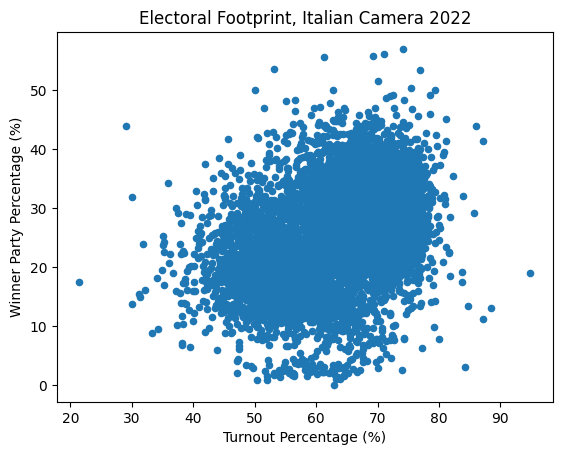

In [59]:

fingerprint = filtered_df.plot.scatter(x='VOTANTITOT_PCT', y='VOTILISTA_PCT')
fingerprint.set_xlabel("Turnout Percentage (%)")
fingerprint.set_ylabel("Winner Party Percentage (%)")
fingerprint.set_title("Electoral Footprint, Italian Camera 2022")



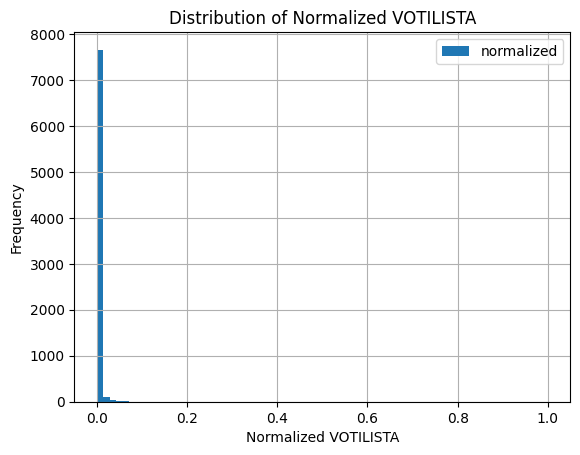

In [68]:
filtered_df['normalized'] = (filtered_df["VOTILISTA"] - filtered_df["VOTILISTA"].min()) / (filtered_df["VOTILISTA"].max() - filtered_df["VOTILISTA"].min())

distribution_norm = filtered_df[['normalized']]

distribution_votes = distribution_norm.plot.hist(bins=70)
distribution_votes.set_xlabel("Normalized VOTILISTA")
distribution_votes.set_ylabel("Frequency")
distribution_votes.set_title("Distribution of Normalized VOTILISTA")
distribution_votes.grid(True)

